<a href="https://colab.research.google.com/github/los61013/MRT-project/blob/main/MRTdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 掛載硬碟

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [3]:
import os

if not os.path.isdir("資料探勘"):
  os.makedirs("資料探勘")

In [4]:
%cd 資料探勘/

/content/gdrive/MyDrive/資料探勘


# 資料整理  
**導入資料**  


In [ ]:
import pandas as pd
import numpy as np

colname = ["date","time","in","out","count"]
df = pd.read_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/before/201712.csv",sep=",",names=colname,on_bad_lines='skip',low_memory=False)

#檢視資料
df.drop(0, inplace=True)
print("data shape:",df.shape)
df

data shape: (7639920, 5)


,date,time,in,out,count
1,2017-12-01,00,松山機場,松山機場,0
2,2017-12-01,00,松山機場,中山國中,0
3,2017-12-01,00,松山機場,南京復興,0
4,2017-12-01,00,松山機場,忠孝復興,0
5,2017-12-01,00,松山機場,大安,0
...,...,...,...,...,...
7639916,2018-01-01,05,丹鳳,徐匯中學,0
7639917,2018-01-01,05,丹鳳,三和國中,1
7639918,2018-01-01,05,丹鳳,三重國小,0
7639919,2018-01-01,05,丹鳳,迴龍,0


**整理資料**  
將資料集整理成[station，date，time，in，out]的形式並重新編碼

In [ ]:
grouped = df.groupby(['date','time','in','out'])
df = grouped.agg({'count': 'sum'}).reset_index()
df['count'] = df['count'].astype(int)
df

,date,time,in,out,count
0,2017-12-01,00,BL板橋,BL板橋,6
1,2017-12-01,00,BL板橋,七張,4
2,2017-12-01,00,BL板橋,三和國中,6
3,2017-12-01,00,BL板橋,三民高中,6
4,2017-12-01,00,BL板橋,三重,0
...,...,...,...,...,...
7639915,2018-01-01,05,龍山寺,頂埔,0
7639916,2018-01-01,05,龍山寺,頂溪,2
7639917,2018-01-01,05,龍山寺,頭前庄,0
7639918,2018-01-01,05,龍山寺,麟光,1


In [ ]:
resultin = df.groupby(['date', 'time', 'in']).agg({'count': 'sum'}).reset_index()
resultin = resultin.rename(columns={'in': 'station', 'count': 'in'})
resultin

,date,time,station,in
0,2017-12-01,00,BL板橋,459
1,2017-12-01,00,七張,47
2,2017-12-01,00,三和國中,57
3,2017-12-01,00,三民高中,33
4,2017-12-01,00,三重,77
...,...,...,...,...
70735,2018-01-01,05,頂埔,56
70736,2018-01-01,05,頂溪,200
70737,2018-01-01,05,頭前庄,17
70738,2018-01-01,05,麟光,45


In [ ]:
resultout = df.groupby(['date', 'time', 'out']).agg({'count': 'sum'}).reset_index()
resultout = resultout.rename(columns={'out': 'station', 'count': 'out'})
resultout

,date,time,station,out
0,2017-12-01,00,BL板橋,362
1,2017-12-01,00,七張,252
2,2017-12-01,00,三和國中,238
3,2017-12-01,00,三民高中,264
4,2017-12-01,00,三重,71
...,...,...,...,...
70735,2018-01-01,05,頂埔,88
70736,2018-01-01,05,頂溪,231
70737,2018-01-01,05,頭前庄,50
70738,2018-01-01,05,麟光,31


In [ ]:
alldata = pd.merge(resultin, resultout, on=['date', 'time', 'station'])
alldata = alldata[['station', 'date', 'time', 'in', 'out']]
alldata

,station,date,time,in,out
0,BL板橋,2017-12-01,00,459,362
1,七張,2017-12-01,00,47,252
2,三和國中,2017-12-01,00,57,238
3,三民高中,2017-12-01,00,33,264
4,三重,2017-12-01,00,77,71
...,...,...,...,...,...
70735,頂埔,2018-01-01,05,56,88
70736,頂溪,2018-01-01,05,200,231
70737,頭前庄,2018-01-01,05,17,50
70738,麟光,2018-01-01,05,45,31


In [ ]:
#alldata.to_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/after/201712.csv", index=False, encoding='utf-8')

# 合併資料

In [ ]:
import glob

# 設定資料夾路徑
folder_path = "/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/after"

# 選取資料夾中的所有csv檔案並按照順序排序
file_list = sorted(glob.glob(folder_path + '/*.csv'))

# 讀取所有csv檔案並合併成一個DataFrame
MRTall = pd.concat([pd.read_csv(file) for file in file_list])

In [ ]:
print(MRTall.shape)
MRTall
#MRTall.to_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/after/MRTall.csv", index=False, encoding='utf-8-sig')

(5301757, 5)


In [44]:
import pandas as pd
import numpy as np
MRTall = pd.read_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/MRTall.csv",sep=",",on_bad_lines='skip',low_memory=False)
MRTall

,station,date,time,in,out
0,BL板橋,2017-01-01,0,361,334
1,七張,2017-01-01,0,56,217
2,三和國中,2017-01-01,0,52,207
3,三民高中,2017-01-01,0,38,226
4,三重,2017-01-01,0,35,71
...,...,...,...,...,...
5301752,頂埔,2023-01-31,23,46,247
5301753,頂溪,2023-01-31,23,264,714
5301754,頭前庄,2023-01-31,23,77,84
5301755,麟光,2023-01-31,23,19,105


In [45]:
df = MRTall.copy()

# 資料處理


將站點改為代號。  
先到TDX運輸資料開放平台請求捷運營運路線車站基本資料API，拿到json檔後取得個站點代碼及名稱作為dict後取代。

In [46]:
import json
import csv

# 讀取JSON檔案
with open("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/stationdata.json", 'r', encoding='utf-8') as f:
    data = json.load(f)
# 取出所有StationID和Zh_tw
stations = []
for route in data:
    for station in route['Stations']:
        station_id = station['StationID']
        station_name = station['StationName']['Zh_tw']
        stations.append([station_id, station_name])

# 寫入CSV檔案
with open("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/stationdata.csv", 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['StationID', 'StationName'])
    writer.writerows(stations)

#將剛剛的csv作為字典
station_dict = {}

with open("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/stationdata.csv", newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        station_dict[row['StationName']] = row['StationID']

df['stationcode'] = df['station'].map(station_dict)
df

,station,date,time,in,out,stationcode
0,BL板橋,2017-01-01,0,361,334,BL07
1,七張,2017-01-01,0,56,217,G03
2,三和國中,2017-01-01,0,52,207,O51
3,三民高中,2017-01-01,0,38,226,O53
4,三重,2017-01-01,0,35,71,O15
...,...,...,...,...,...,...
5301752,頂埔,2023-01-31,23,46,247,BL01
5301753,頂溪,2023-01-31,23,264,714,O04
5301754,頭前庄,2023-01-31,23,77,84,Y18
5301755,麟光,2023-01-31,23,19,105,BR06


發現有站名跟代碼對不起來所以顯示"NAN"  
其中只有BL板橋、Y板橋、大橋頭站的名稱有問題所以直接去Json手動改就好。

In [ ]:
#不用執行
unique_values = nan_rows['station'].unique()
unique_values

array(['BL板橋', '大橋頭站', 'Y板橋'], dtype=object)

改完後

In [47]:
nan = df[df['stationcode'].isnull()]
nan

,station,date,time,in,out,stationcode


重新排序欄位跟計算總人數

In [48]:
newcl = ['stationcode', 'date', 'time', 'in', 'out']
df = df.reindex(columns=newcl)
df['all'] = df['in'] + df['out']
print(df.dtypes)
df

stationcode    object
date           object
time            int64
in              int64
out             int64
all             int64
dtype: object


,stationcode,date,time,in,out,all
0,BL07,2017-01-01,0,361,334,695
1,G03,2017-01-01,0,56,217,273
2,O51,2017-01-01,0,52,207,259
3,O53,2017-01-01,0,38,226,264
4,O15,2017-01-01,0,35,71,106
...,...,...,...,...,...,...
5301752,BL01,2023-01-31,23,46,247,293
5301753,O04,2023-01-31,23,264,714,978
5301754,Y18,2023-01-31,23,77,84,161
5301755,BR06,2023-01-31,23,19,105,124


In [20]:
df = df.sort_values(by=['date', 'time', 'stationcode'])
df

,stationcode,date,time,in,out,all
103,BL01,2017-01-01,0,22,160,182
77,BL02,2017-01-01,0,39,110,149
39,BL03,2017-01-01,0,35,134,169
80,BL04,2017-01-01,0,43,351,394
11,BL05,2017-01-01,0,81,161,242
...,...,...,...,...,...,...
5301639,Y16,2023-01-31,23,181,58,239
5301706,Y17,2023-01-31,23,36,45,81
5301754,Y18,2023-01-31,23,77,84,161
5301693,Y19,2023-01-31,23,37,86,123


先將資料按照日期及時段排序並將日期改為星期並編碼。

In [49]:
from datetime import datetime

df['weekday'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').weekday()+1)
df['weekday'] = df['weekday'].astype(str)
df['time'] = df['time'].astype(str)
df['weekday'] = pd.Categorical(df['weekday'], categories=['1', '2', '3', '4', '5', '6', '7'])
df['time'] = pd.Categorical(df['time'], categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'])
print(df.dtypes)
df

stationcode      object
date             object
time           category
in                int64
out               int64
all               int64
weekday        category
dtype: object


,stationcode,date,time,in,out,all,weekday
0,BL07,2017-01-01,0,361,334,695,7
1,G03,2017-01-01,0,56,217,273,7
2,O51,2017-01-01,0,52,207,259,7
3,O53,2017-01-01,0,38,226,264,7
4,O15,2017-01-01,0,35,71,106,7
...,...,...,...,...,...,...,...
5301752,BL01,2023-01-31,23,46,247,293,2
5301753,O04,2023-01-31,23,264,714,978,2
5301754,Y18,2023-01-31,23,77,84,161,2
5301755,BR06,2023-01-31,23,19,105,124,2


In [50]:
newcl = ['stationcode', 'date', 'time', 'all']
df = df.reindex(columns=newcl)
print(df.dtypes)
df

stationcode      object
date             object
time           category
all               int64
dtype: object


,stationcode,date,time,all
0,BL07,2017-01-01,0,695
1,G03,2017-01-01,0,273
2,O51,2017-01-01,0,259
3,O53,2017-01-01,0,264
4,O15,2017-01-01,0,106
...,...,...,...,...
5301752,BL01,2023-01-31,23,293
5301753,O04,2023-01-31,23,978
5301754,Y18,2023-01-31,23,161
5301755,BR06,2023-01-31,23,124


In [51]:
#df.to_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/MRTdata-date.csv", index=False, encoding='utf-8-sig')

#  **資料集確認**

In [37]:
MRTdatadateweek = pd.read_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/MRTdata-dateweek.csv", sep=",", on_bad_lines='skip', low_memory=False)
MRTdatadateweek

,stationcode,date,weekday,time,all
0,BL07,2017-01-01,7,0,695
1,G03,2017-01-01,7,0,273
2,O51,2017-01-01,7,0,259
3,O53,2017-01-01,7,0,264
4,O15,2017-01-01,7,0,106
...,...,...,...,...,...
5301752,BL01,2023-01-31,2,23,293
5301753,O04,2023-01-31,2,23,978
5301754,Y18,2023-01-31,2,23,161
5301755,BR06,2023-01-31,2,23,124


In [52]:
MRTdatadate = pd.read_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/MRTdata-date.csv", sep=",", on_bad_lines='skip', low_memory=False)
MRTdatadate

,stationcode,date,time,all
0,BL07,2017-01-01,0,695
1,G03,2017-01-01,0,273
2,O51,2017-01-01,0,259
3,O53,2017-01-01,0,264
4,O15,2017-01-01,0,106
...,...,...,...,...
5301752,BL01,2023-01-31,23,293
5301753,O04,2023-01-31,23,978
5301754,Y18,2023-01-31,23,161
5301755,BR06,2023-01-31,23,124


In [43]:
MRTdataweek = pd.read_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/MRTdata-week.csv", sep=",", on_bad_lines='skip', low_memory=False)
MRTdataweek

,stationcode,weekday,time,all
0,BL07,7,0,695
1,G03,7,0,273
2,O51,7,0,259
3,O53,7,0,264
4,O15,7,0,106
...,...,...,...,...
5301752,BL01,2,23,293
5301753,O04,2,23,978
5301754,Y18,2,23,161
5301755,BR06,2,23,124


In [40]:
MRTdatastdateweek = pd.read_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/MRTdata-stdateweek.csv", sep=",", on_bad_lines='skip', low_memory=False)
MRTdatastdateweek

,stationcode,date,weekday,time,all
0,BL01,2017-01-01,7,0,182
1,BL02,2017-01-01,7,0,149
2,BL03,2017-01-01,7,0,169
3,BL04,2017-01-01,7,0,394
4,BL05,2017-01-01,7,0,242
...,...,...,...,...,...
5301752,Y16,2023-01-31,2,23,239
5301753,Y17,2023-01-31,2,23,81
5301754,Y18,2023-01-31,2,23,161
5301755,Y19,2023-01-31,2,23,123


In [39]:
MRTdatastdate = pd.read_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/MRTdata-stdate.csv", sep=",", on_bad_lines='skip', low_memory=False)
MRTdatastdate

,stationcode,date,time,all
0,BL01,2017-01-01,0,182
1,BL02,2017-01-01,0,149
2,BL03,2017-01-01,0,169
3,BL04,2017-01-01,0,394
4,BL05,2017-01-01,0,242
...,...,...,...,...
5301752,Y16,2023-01-31,23,239
5301753,Y17,2023-01-31,23,81
5301754,Y18,2023-01-31,23,161
5301755,Y19,2023-01-31,23,123


In [41]:
MRTdatastweek = pd.read_csv("/content/gdrive/MyDrive/資料探勘/MRT/MRTdata/MRTdata-stweek.csv", sep=",", on_bad_lines='skip', low_memory=False)
MRTdatastweek

,stationcode,weekday,time,all
0,BL01,7,0,182
1,BL02,7,0,149
2,BL03,7,0,169
3,BL04,7,0,394
4,BL05,7,0,242
...,...,...,...,...
5301752,Y16,2,23,239
5301753,Y17,2,23,81
5301754,Y18,2,23,161
5301755,Y19,2,23,123


# **格拉姆角場**



**GAF、GASF、GADF** 是三種基於傅立葉轉換的時間序列圖像化方法。  
可以將時間序列轉換成圖像，便於視覺化、分析和建模。具體來說，它們都是通過將時間  
序列分成若干等長的子序列，將每個子序列轉換成一個格拉姆角場(Gramian Angular Field)的形式。  
而不同之處在於如何計算格拉姆角場。  

---

GAF 將每個子序列轉換成一個格拉姆角場，透過計算子序列的正弦和餘弦的乘積。  
GASF 則是將每個子序列轉換成一個格拉姆角場，透過計算子序列正弦和餘弦的和。  
GADF 則是計算子序列的正弦和餘弦的差值來得到格拉姆角場。  

---


其步驟為:  
 
1.   將原始時間序列切割成若干個等長的子序列。
2.   對每個子序列進行歸一化處理，即將每個數值減去平均值，除以標準差。
3.   計算每個子序列的正弦和餘弦值，透過這些值來構建格拉姆角場。
4.   將格拉姆角場轉換成圖像形式，進行視覺化展示或特徵提取。

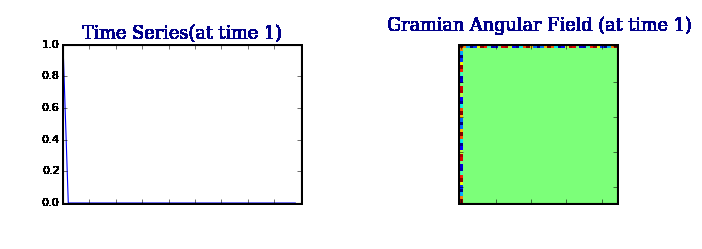


In [ ]:
!pip install pyts

Found existing installation: pyts 0.7.1
Uninstalling pyts-0.7.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/pyts-0.7.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/pyts/*
Proceed (Y/n)? Y
  Successfully uninstalled pyts-0.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pyts-0.12.0-py3-none-any.whl (2.5 MB)


In [ ]:
from pyts.image import GramianAngularField
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data = df
#先將all人數資料做min-max

scaler = MinMaxScaler()
data['all'] = scaler.fit_transform(data[['all']])

# 將資料集轉換成2D格式
data2d = pd.pivot_table(data, values='all', index=['stationcode'], columns=['weekday', 'time'], fill_value=0)

# 建立GASF、GADF模型並轉換資料
gasf = GramianAngularField(image_size=119, method='summation')
X_gasf = gasf.fit_transform(data2d.values)

gadf = GramianAngularField(image_size=119, method='difference')
X_gadf = gadf.fit_transform(data2d.values)

顯示結果

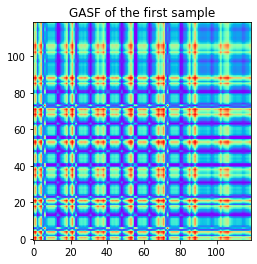

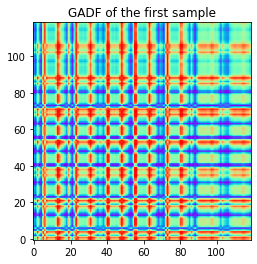

In [ ]:
plt.imshow(X_gasf[0], cmap='rainbow', origin='lower')
plt.title('GASF of the first sample')
plt.show()

plt.imshow(X_gadf[0], cmap='rainbow', origin='lower')
plt.title('GADF of the first sample')
plt.show()